In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *


In [2]:
path = "/tmp/cg-training-set"
pics = get_image_files(path)
failed = verify_images(pics)
print("failed: ", failed)
print("pic count: ", len(pics))

failed:  []
pic count:  8013


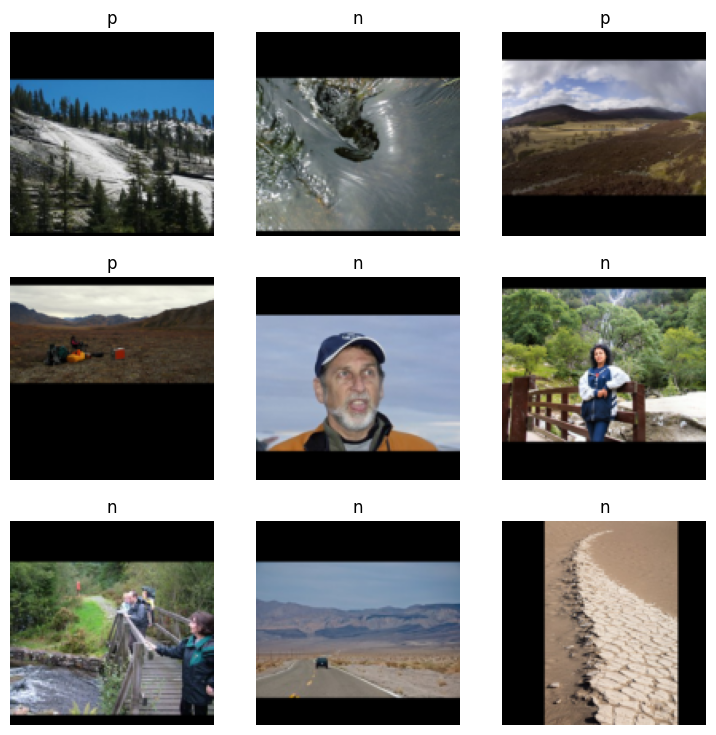

In [3]:
data = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[
        Resize(method="pad", pad_mode="zeros", size=128),
    ],
)
dls = data.dataloaders(path)
dls.show_batch()

In [4]:
l = vision_learner(dls, resnet18, metrics=[accuracy])
l.fine_tune(0)

epoch,train_loss,valid_loss,accuracy,time
0,0.738183,0.478890,0.794632,00:20


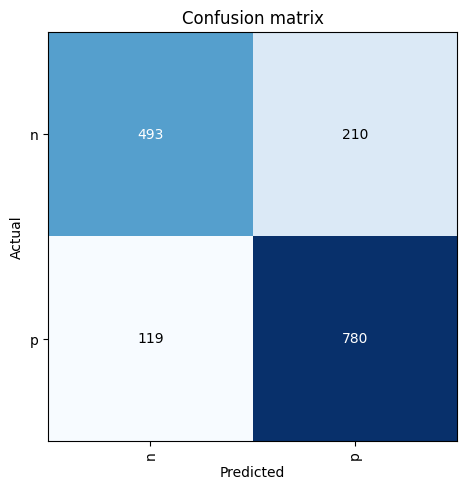

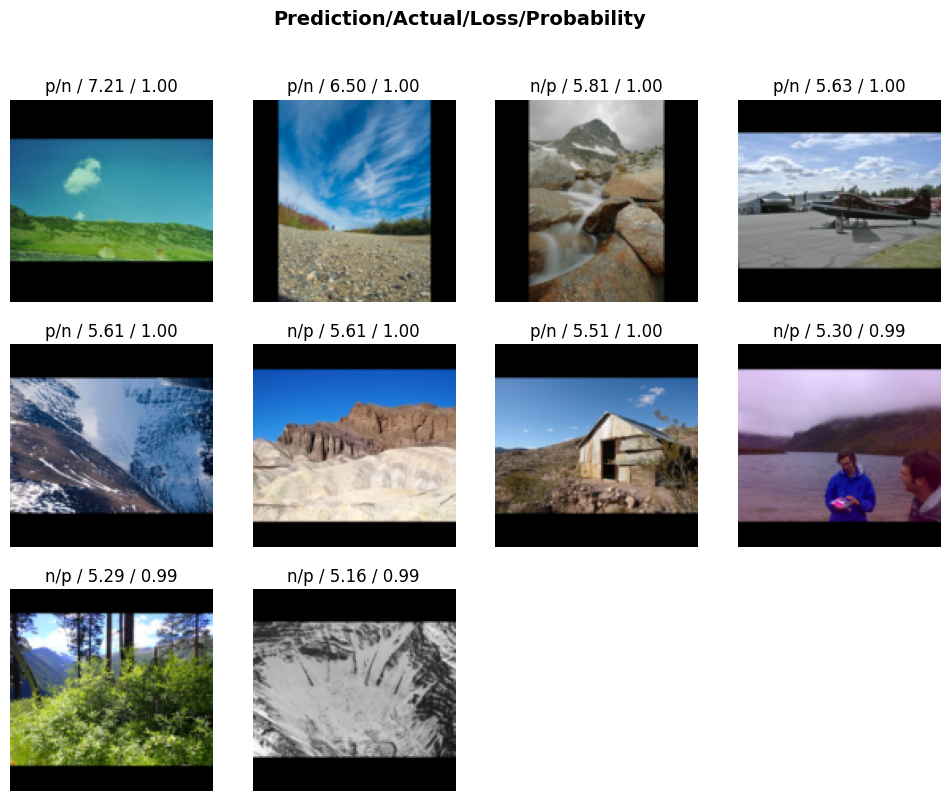

In [5]:
interp = ClassificationInterpretation.from_learner(l)
interp.plot_confusion_matrix()
interp.plot_top_losses(10)

This looks okay if I visit jupyter online. Is it a dark theme issue? Yes it is